Questions to ask: 
1. What are the common (top 5) crime categories in the cities of investigation: Cerritos, Torrance, and Pasadena? 
2. What are the change in count of crimes?
3. what is the correlation between home prices and time series? 
4. plot the crime frequency over time? Is there a correlation; possibly split it by year and instead of compiling it into one 


In [1]:
%matplotlib notebook

In [2]:
#dependencies
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import seaborn as sns
import random



In [3]:
#read csv file and convert to dataframe
home_prices_df = pd.read_csv('Resources/City_Zhvi_SingleFamilyResidence.csv')

#filter original dataframe to contain records for only cities in Los Angeles county
home_prices_df = home_prices_df.loc[home_prices_df.CountyName == "Los Angeles"]

#delete data columns not needed for data analysis 
del home_prices_df['RegionID']
del home_prices_df['Metro']
del home_prices_df['SizeRank']



In [4]:
home_prices_df = home_prices_df.reset_index(drop=True)
home_prices_df = home_prices_df.rename(columns={'RegionName':'CITY'})
filter_time_home_prices = home_prices_df.loc[:,'2005-01':'2017-12']
filter_time_home_prices['CITY'] = list(home_prices_df['CITY'])
filter_time_home_prices.head()

,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,CITY
0,533100.0,539900.0,547000.0,554400.0,562200.0,570600.0,579500.0,588100.0,596500.0,604600.0,...,653500,656900,661200,665600,671300,677400,683200,688500,693800,Los Angeles
1,510800.0,516900.0,523000.0,529200.0,535500.0,542100.0,548900.0,555300.0,561500.0,567200.0,...,590300,592900,595900,599200,604500,610500,615300,618900,621700,Long Beach
2,692800.0,698800.0,705300.0,712400.0,719900.0,727900.0,736200.0,744100.0,751800.0,759000.0,...,856100,858500,863600,868900,874900,881800,888700,894700,900400,Glendale
3,270200.0,275100.0,279800.0,284500.0,289100.0,293800.0,298600.0,303300.0,308000.0,312600.0,...,241500,244300,247400,250500,253900,257600,261000,264100,266900,Lancaster
4,302700.0,307800.0,313000.0,318600.0,324200.0,329900.0,335500.0,340500.0,345200.0,349600.0,...,272000,274900,277800,280600,284000,287400,290300,293500,297000,Palmdale


In [5]:
indexed_home_prices = filter_time_home_prices.set_index('CITY')
#filtered_home_prices_df

#---------------------------------------------

#goal is to take the time series of medians of home prices

sample_df = indexed_home_prices.T.reset_index()
sample_df

CITY,index,Los Angeles,Long Beach,Glendale,Lancaster,Palmdale,Santa Clarita,Pomona,Pasadena,Torrance,...,Acton,Avalon,Pearblossom,Rolling Hills Estates,Rolling Hills,Hidden Hills,Palos Verdes Peninsula,Lake Hughes,East Pasadena,Green Valley
0,2005-01,533100.0,510800.0,692800.0,270200.0,302700.0,517300.0,329700.0,655400.0,670000.0,...,585800.0,592100.0,NaN,1328400.0,2718600.0,2331700.0,1343600.0,283800.0,672200.0,277400.0
1,2005-02,539900.0,516900.0,698800.0,275100.0,307800.0,523400.0,335900.0,661400.0,676400.0,...,593700.0,596900.0,NaN,1338900.0,2735500.0,2346500.0,1354600.0,287100.0,680600.0,282200.0
2,2005-03,547000.0,523000.0,705300.0,279800.0,313000.0,530000.0,342200.0,667700.0,683100.0,...,601700.0,604500.0,NaN,1352100.0,2752100.0,2365500.0,1365400.0,289900.0,687900.0,287500.0
3,2005-04,554400.0,529200.0,712400.0,284500.0,318600.0,537000.0,348900.0,674400.0,690100.0,...,609900.0,614400.0,NaN,1367600.0,2768800.0,2390300.0,1375400.0,292400.0,694900.0,293500.0
4,2005-05,562200.0,535500.0,719900.0,289100.0,324200.0,544400.0,355500.0,681700.0,697500.0,...,617700.0,625500.0,NaN,1383900.0,2785200.0,2420100.0,1384100.0,294900.0,702600.0,299800.0
5,2005-06,570600.0,542100.0,727900.0,293800.0,329900.0,552200.0,362400.0,690200.0,705600.0,...,625600.0,636900.0,NaN,1400500.0,2803000.0,2454500.0,1392700.0,298100.0,712000.0,306700.0
6,2005-07,579500.0,548900.0,736200.0,298600.0,335500.0,560400.0,369400.0,699300.0,714400.0,...,633800.0,649700.0,NaN,1416600.0,2821400.0,2490500.0,1401800.0,301800.0,722600.0,313400.0
7,2005-08,588100.0,555300.0,744100.0,303300.0,340500.0,568300.0,376100.0,708200.0,723100.0,...,642200.0,665000.0,NaN,1431800.0,2837900.0,2523100.0,1411100.0,305500.0,733300.0,318200.0
8,2005-09,596500.0,561500.0,751800.0,308000.0,345200.0,575800.0,382600.0,716800.0,731500.0,...,651400.0,684000.0,NaN,1446600.0,2850700.0,2549700.0,1421600.0,309600.0,743000.0,321200.0
9,2005-10,604600.0,567200.0,759000.0,312600.0,349600.0,582800.0,388600.0,724600.0,739000.0,...,661300.0,706200.0,NaN,1460400.0,2857300.0,2567800.0,1432700.0,313900.0,751000.0,323100.0


In [6]:
sample_df['index'] =  pd.to_datetime(sample_df['index'], format='%Y-%m')
sample_df = sample_df.rename(columns={'index':'Date'})
sample_df

CITY,Date,Los Angeles,Long Beach,Glendale,Lancaster,Palmdale,Santa Clarita,Pomona,Pasadena,Torrance,...,Acton,Avalon,Pearblossom,Rolling Hills Estates,Rolling Hills,Hidden Hills,Palos Verdes Peninsula,Lake Hughes,East Pasadena,Green Valley
0,2005-01-01,533100.0,510800.0,692800.0,270200.0,302700.0,517300.0,329700.0,655400.0,670000.0,...,585800.0,592100.0,NaN,1328400.0,2718600.0,2331700.0,1343600.0,283800.0,672200.0,277400.0
1,2005-02-01,539900.0,516900.0,698800.0,275100.0,307800.0,523400.0,335900.0,661400.0,676400.0,...,593700.0,596900.0,NaN,1338900.0,2735500.0,2346500.0,1354600.0,287100.0,680600.0,282200.0
2,2005-03-01,547000.0,523000.0,705300.0,279800.0,313000.0,530000.0,342200.0,667700.0,683100.0,...,601700.0,604500.0,NaN,1352100.0,2752100.0,2365500.0,1365400.0,289900.0,687900.0,287500.0
3,2005-04-01,554400.0,529200.0,712400.0,284500.0,318600.0,537000.0,348900.0,674400.0,690100.0,...,609900.0,614400.0,NaN,1367600.0,2768800.0,2390300.0,1375400.0,292400.0,694900.0,293500.0
4,2005-05-01,562200.0,535500.0,719900.0,289100.0,324200.0,544400.0,355500.0,681700.0,697500.0,...,617700.0,625500.0,NaN,1383900.0,2785200.0,2420100.0,1384100.0,294900.0,702600.0,299800.0
5,2005-06-01,570600.0,542100.0,727900.0,293800.0,329900.0,552200.0,362400.0,690200.0,705600.0,...,625600.0,636900.0,NaN,1400500.0,2803000.0,2454500.0,1392700.0,298100.0,712000.0,306700.0
6,2005-07-01,579500.0,548900.0,736200.0,298600.0,335500.0,560400.0,369400.0,699300.0,714400.0,...,633800.0,649700.0,NaN,1416600.0,2821400.0,2490500.0,1401800.0,301800.0,722600.0,313400.0
7,2005-08-01,588100.0,555300.0,744100.0,303300.0,340500.0,568300.0,376100.0,708200.0,723100.0,...,642200.0,665000.0,NaN,1431800.0,2837900.0,2523100.0,1411100.0,305500.0,733300.0,318200.0
8,2005-09-01,596500.0,561500.0,751800.0,308000.0,345200.0,575800.0,382600.0,716800.0,731500.0,...,651400.0,684000.0,NaN,1446600.0,2850700.0,2549700.0,1421600.0,309600.0,743000.0,321200.0
9,2005-10-01,604600.0,567200.0,759000.0,312600.0,349600.0,582800.0,388600.0,724600.0,739000.0,...,661300.0,706200.0,NaN,1460400.0,2857300.0,2567800.0,1432700.0,313900.0,751000.0,323100.0


In [7]:
#create pandas dataframe for historical crime data (2017) from csv file
crime_data_df_2017 = pd.read_csv("RawData/2017-PART_I_AND_II_CRIMES.csv")
crime_data_df_2017.head()

#create pandas dataframe for historical crime data (2016) from csv file
crime_data_df_2016 = pd.read_csv("RawData/2016-PART_I_AND_II_CRIMES.csv")
crime_data_df_2016.head()

#create pandas dataframe for historical crime data (2015) from csv file
crime_data_df_2015 = pd.read_csv("RawData/2015-PART_I_AND_II_CRIMES.csv")
crime_data_df_2015.head()

#create pandas dataframe for historical crime data (2014) from csv file
crime_data_df_2014 = pd.read_csv("RawData/2014-PART_I_AND_II_CRIMES.csv")
crime_data_df_2014.head()

#create pandas dataframe for historical crime data (2013) from csv file
crime_data_df_2013 = pd.read_csv("RawData/2013-PART_I_AND_II_CRIMES.csv")
crime_data_df_2013.head()

#create pandas dataframe for historical crime data (2012) from csv file
crime_data_df_2012 = pd.read_csv("RawData/2012-PART_I_AND_II_CRIMES.csv")
crime_data_df_2012.head()

#create pandas dataframe for historical crime data (2011) from csv file
crime_data_df_2011 = pd.read_csv("RawData/2011-PART_I_AND_II_CRIMES.csv")
crime_data_df_2011.head()

#create pandas dataframe for historical crime data (2010) from csv file
crime_data_df_2010 = pd.read_csv("RawData/2010-PART_I_AND_II_CRIMES.csv")
crime_data_df_2010.head()

#create pandas dataframe for historical crime data (2009) from csv file
crime_data_df_2009 = pd.read_csv("RawData/2009-PART_I_AND_II_CRIMES.csv")
crime_data_df_2009.head()

#create pandas dataframe for historical crime data (2008) from csv file
crime_data_df_2008 = pd.read_csv("RawData/2008-PART_I_AND_II_CRIMES.csv")
crime_data_df_2008.head()

#create pandas dataframe for historical crime data (2007) from csv file
crime_data_df_2007 = pd.read_csv("RawData/2007-PART_I_AND_II_CRIMES.csv")
crime_data_df_2007.head()

#create pandas dataframe for historical crime data (2006) from csv file
crime_data_df_2006 = pd.read_csv("RawData/2006-PART_I_AND_II_CRIMES.csv")
crime_data_df_2006.head()

#create pandas dataframe for historical crime data (2005) from csv file
crime_data_df_2005 = pd.read_csv("RawData/2005-PART_I_AND_II_CRIMES.csv")
crime_data_df_2005.head()

frames = [crime_data_df_2017, crime_data_df_2016, crime_data_df_2015, crime_data_df_2015, crime_data_df_2014, crime_data_df_2013, 
            crime_data_df_2012, crime_data_df_2011, crime_data_df_2010, crime_data_df_2009, crime_data_df_2008, crime_data_df_2007, 
          crime_data_df_2006, crime_data_df_2005]

#combine historical crime data
combined_data_df = pd.concat(frames)

#convert incident reported date to time string
combined_data_df['INCIDENT_REPORTED_DATE'] = pd.to_datetime(combined_data_df['INCIDENT_REPORTED_DATE'], format='%m/%d/%Y')
combined_data_df

,LURN_SAK,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,GANG_RELATED,UNIT_ID,UNIT_NAME,DELETED
0,18288959.0,8/3/2017 23:53,2017-08-03,VEHICLE / BOATING LAWS,255.0,VEHICLE AND BOATING LAWS: Misdemeanor,"4300 ROSEMEAD BLVD, ROSEMEAD, CA 91770",4300 ROSEMEAD BLVD,ROSEMEAD,91770.0,917-08914-0531,531.0,8914.0,NO,CA0190005,TEMPLE,N
1,18079991.0,3/7/2017 8:23,2017-03-07,MISCELLANEOUS NON-CRIMINAL,720.0,"VEHICLE/BOATING LAWS, CITATIONS: Hazardous Cit...","CLARK AVE AND MAPLE ST, BELLFLOWER, CA 90706",CLARK AVE AND MAPLE ST,BELLFLOWER,90706.0,917-05086-1334,1334.0,5086.0,NO,CA0190013,LAKEWOOD,N
2,18215223.0,5/24/2017 9:20,2017-05-24,MISCELLANEOUS NON-CRIMINAL,501.0,MISCELLANEOUS: Vehicle Repossessed,"11000 ALONDRA BLVD, CERRITOS, CA",11000 ALONDRA BLVD,CERRITOS,NaN,917-02607-2310,2310.0,2607.0,NO,CA01900R7,CERRITOS,N
3,18077911.0,3/4/2017 22:18,2017-03-04,MISCELLANEOUS NON-CRIMINAL,687.0,"NON-CRIMINAL, CUSTODY INCIDENTS - Inmate Sick/...","11800 S ALAMEDA ST, LYNWOOD, CA 90262",11800 S ALAMEDA ST,LYNWOOD,90262.0,017-00612-5700,5700.0,612.0,NO,CA0190053,CRDF,N
4,18382253.0,10/31/2017 5:00,2017-10-31,ACCIDENTS TRAFFIC/VEH./BOAT,471.0,"ACCIDENTS, TRAFFIC-VEHICLE OR BOAT: Accident, ...","10TH ST W AND AVENUE L, LANCASTER, CA",10TH ST W AND AVENUE L,LANCASTER,NaN,917-21237-1124,1124.0,21237.0,NO,CA0190024,LANCASTER,N
5,18078130.0,3/5/2017 4:30,2017-03-05,MISCELLANEOUS NON-CRIMINAL,502.0,MISCELLANEOUS: Injury To County Employee,"29400 THE OLD ROAD, CASTAIC, CA 91384",29400 THE OLD ROAD,CASTAIC,91384.0,017-00135-5610,5610.0,135.0,NO,CA0190082,PDC-SOUTH,N
6,18181132.0,4/11/2017 0:00,2017-04-24,BURGLARY,78.0,"BURGLARY, OTHER STRUCTURE: Unknown, Entry No F...","5900 CENTINELA AVE, LOS ANGELES, CA",5900 CENTINELA AVE,LOS ANGELES,NaN,917-01030-2766,2766.0,1030.0,NO,CA0190065,MARINA DEL REY,N
7,18015552.0,1/5/2017 13:50,2017-01-05,MISCELLANEOUS NON-CRIMINAL,501.0,MISCELLANEOUS: Vehicle Repossessed,"20800 S AVALON BLVD, CARSON, CA 90746",20800 S AVALON BLVD,CARSON,90746.0,917-00180-1619,1619.0,180.0,NO,CA0190016,CARSON,N
8,18177210.0,4/20/2017 10:46,2017-04-20,MISCELLANEOUS NON-CRIMINAL,735.0,"VEHICLE/BOAT, OTHER NON-CRIMINAL: Vehicle/Boat...","700 E BONITA AVE, SAN DIMAS, CA 91773",700 E BONITA AVE,SAN DIMAS,91773.0,917-02028-0815,815.0,2028.0,NO,CA0190008,SAN DIMAS,N
9,18173307.0,4/16/2017 21:00,2017-04-16,LARCENY THEFT,383.0,"THEFT, PETTY: Shoplifting (From Dept Store, Mk...","200 UNIVERSAL CITY PLAZA DR, UNIVERSAL CITY, C...",200 UNIVERSAL CITY PLAZA DR,UNIVERSAL CITY,91608.0,917-01968-0980,980.0,1968.0,NO,CA0190009,WEST HOLLYWOOD,N


In [114]:
#randomly generate 5 cities from housing price dataset to find the crime count in crime dataset
crime_city_list = list(combined_data_df['CITY'].unique())
city_list = home_prices_df['CITY']

random_city_list = []

while len(random_city_list) < 5: 
    city = random.choice(city_list)
    city = city.upper()
    if city in crime_city_list and city not in random_city_list:
        city = city.title()
        random_city_list.append(city)
        city = city.upper()


<IPython.core.display.Javascript object>


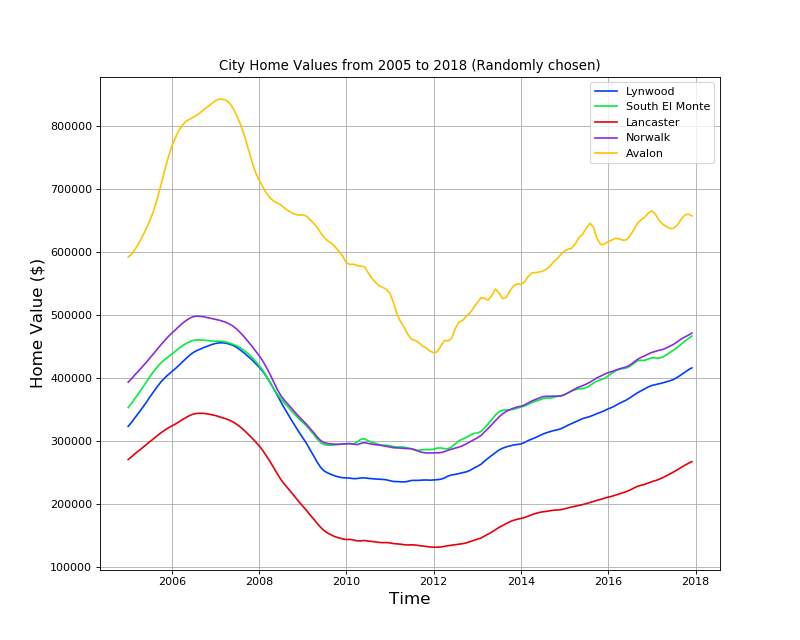

In [115]:
#plot time series of change in randomly selected home prices
plt.figure(figsize=(10,8))
plt.xlabel("Time", fontsize=15)
plt.ylabel("Home Value ($)", fontsize=15)
plt.grid()

for city in random_city_list:
    plt.plot(sample_df['Date'], sample_df[city])
plt.legend() 
plt.title('City Home Values from 2005 to 2018 (Randomly chosen)')
plt.show()

plt.savefig('randomlySelectCity.png')


In [110]:
#function to create sorted city's total crime dataframe
def sort_city_crime_data(combined_data_df, city):
    city_crime_data = combined_data_df[combined_data_df['CITY'] == city]
    return city_crime_data

#function to group reported crime dates to month categories 
def monthlyCrimeCount_df(city_crime_data, city_count):
    city_count_byDate = city_crime_data['INCIDENT_REPORTED_DATE'].value_counts()
    city_count_byDate = city_count_byDate.reset_index()
    city_count_byDate = city_count_byDate.rename(columns={'index':'Date', 'INCIDENT_REPORTED_DATE':'Count'})
    city_count_byDate = city_count_byDate.sort_values(by='Date')
    city_count_byDate = city_count_byDate.reset_index(drop=True)

    #convert date to month and year for Cerritos
    yearMonth = []
    for index, row in city_count_byDate.iterrows():
        crime_mY = str(row['Date'].year) + '-' + str(row['Date'].month)
        yearMonth.append(crime_mY)

    #append crime count dates to Year-Month category to group by month   
    city_count_byDate['Year-Month'] = yearMonth
    
    #crime count by month dataframe 
    #format 'Year-Month' string to datetime format
    city_count_byDate['Year-Month'] = pd.to_datetime(city_count_byDate['Year-Month'], format='%Y-%m')
    
    #calculate the sum of crimes for each month of the year
    city_sum_month = city_count_byDate.groupby('Year-Month')['Count'].sum()
    
    #city crime count by month dataframe
    cityCrime_month = city_sum_month.reset_index()
    
    cityCrime_month = cityCrime_month.rename(columns={'Count':city_count})
    
    return cityCrime_month



In [116]:
#generate dataframe for randomly selected cities
x = False
for city in random_city_list: 
    if x == False:
        city_crime_data = sort_city_crime_data(combined_data_df, city.upper())
        city_crime = monthlyCrimeCount_df(city_crime_data, city)
        final_df = city_crime
        x = True
    else:
        city_crime_data = sort_city_crime_data(combined_data_df, city.upper())
        city_crime = monthlyCrimeCount_df(city_crime_data, city)
        final_df = final_df.merge(city_crime, how='outer')

final_df.fillna(0, inplace=True)


In [117]:
final_df

,Year-Month,Lynwood,South El Monte,Lancaster,Norwalk,Avalon
0,2005-01-01,800,262,1866,1111,34
1,2005-02-01,655,217,1871,1053,51
2,2005-03-01,947,281,2258,1199,71
3,2005-04-01,863,264,2044,1178,76
4,2005-05-01,857,313,2196,1213,69
5,2005-06-01,865,249,2162,1158,68
6,2005-07-01,750,259,2045,1284,98
7,2005-08-01,790,282,2191,1288,90
8,2005-09-01,706,279,2139,1119,75
9,2005-10-01,652,282,2283,1115,45


<IPython.core.display.Javascript object>


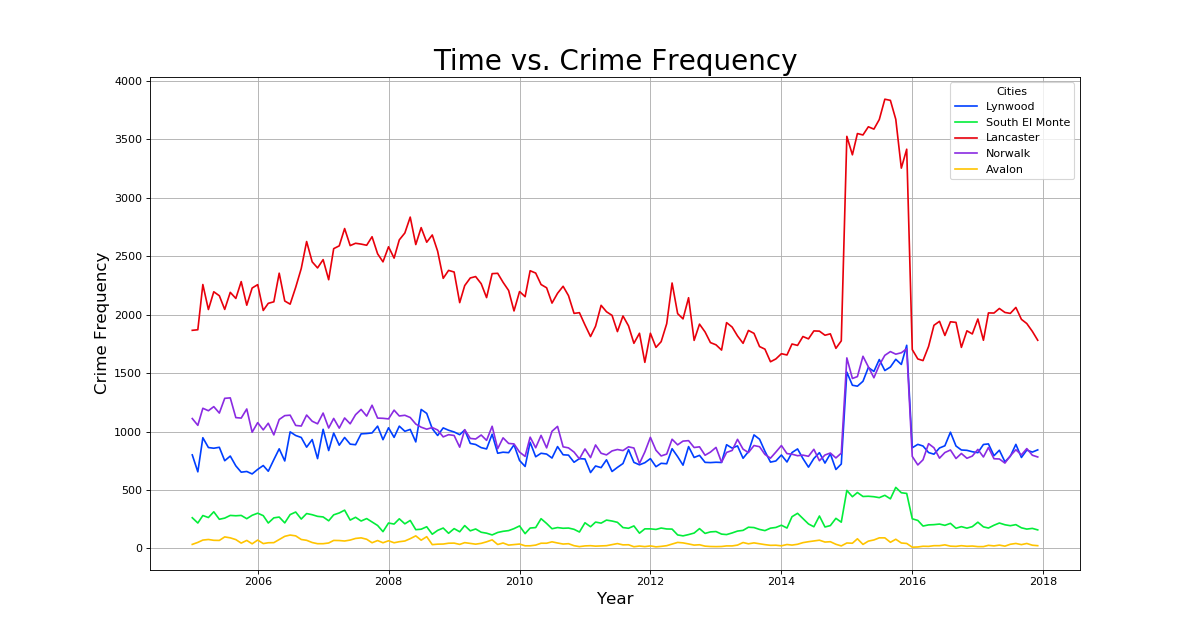

In [118]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.style.use('seaborn-bright')

for city in random_city_list: 
    plt.plot(final_df['Year-Month'], final_df[city])


plt.legend(title='Cities')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.title('Time vs. Crime Frequency', fontsize=25)
plt.show()
plt.savefig('CityCrimeCount.png')

In [ ]:

final_df.head()

In [21]:
combined_data_df['CATEGORY'].value_counts()

MISCELLANEOUS NON-CRIMINAL      1210887
LARCENY THEFT                    473851
VEHICLE / BOATING LAWS           385808
NARCOTICS                        295578
BURGLARY                         200737
NON-AGGRAVATED ASSAULTS          194319
VANDALISM                        191998
GRAND THEFT AUTO                 188019
ACCIDENTS TRAFFIC/VEH./BOAT      184836
JUVENILE NON-CRIMINAL            149907
FRAUD AND NSF CHECKS             118165
PERSONS MISSING                  116699
AGGRAVATED ASSAULT               101386
ROBBERY                           70479
MISDEMEANORS MISCELLANEOUS        58823
WEAPON LAWS                       53160
MENTALLY ILL                      40644
FELONIES MISCELLANEOUS            39456
DRUNK DRIVING VEHICLE / BOAT      38823
FORGERY                           35686
DRUNK / ALCOHOL / DRUGS           35165
DISORDERLY CONDUCT                21118
SEX OFFENSES MISDEMEANORS         20311
LIQUOR LAWS                       19740
SEX OFFENSES FELONIES             17991


In [22]:
compton_crime_data = sort_city_crime_data(combined_data_df, 'ROLLING HILLS')
compton_crime = monthlyCrimeCount_df(compton_crime_data, 'Rolling Hills Crime Count')
littlerock_crime_data = sort_city_crime_data(combined_data_df, 'BEVERLY HILLS')
littlerock_crime = monthlyCrimeCount_df(littlerock_crime_data, 'Beverly Hills Crime Count')
palm_crime_data = sort_city_crime_data(combined_data_df, 'HIDDEN HILLS')
palm_crime = monthlyCrimeCount_df(palm_crime_data, 'Hidden Hills Crime Count')


final_df_2 = compton_crime.merge(littlerock_crime,on='Year-Month').merge(palm_crime,on='Year-Month')
final_df_2.head()


,Year-Month,Rolling Hills Crime Count,Beverly Hills Crime Count,Hidden Hills Crime Count
0,2005-01-01,2,9,4
1,2005-02-01,2,7,5
2,2005-03-01,8,3,4
3,2005-04-01,7,5,4
4,2005-05-01,4,4,3


<IPython.core.display.Javascript object>


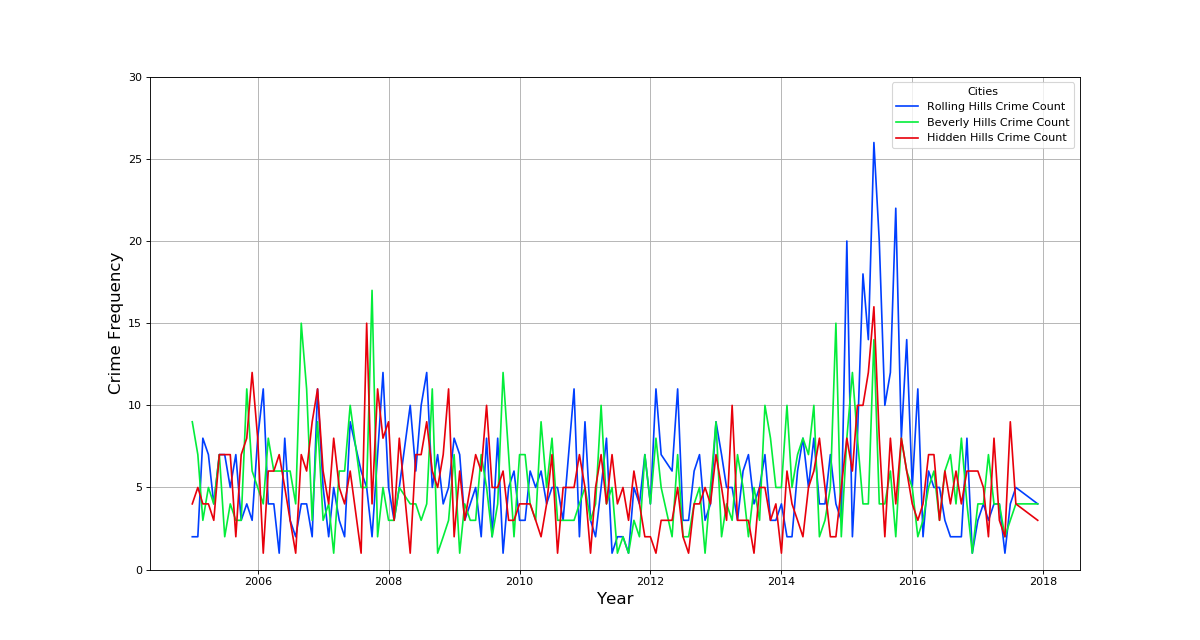

In [23]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.style.use('seaborn-bright')

plt.plot(final_df_2['Year-Month'], final_df_2['Rolling Hills Crime Count'])
plt.ylim(0, 30)

plt.plot(final_df_2['Year-Month'], final_df_2['Beverly Hills Crime Count'])
plt.ylim(0, 30)

plt.plot(final_df_2['Year-Month'], final_df_2['Hidden Hills Crime Count'])
plt.ylim(0, 30)

plt.legend(title='Cities')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Crime Frequency', fontsize=15)
plt.show()
plt.savefig('CityCrimeCount.png')